In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iplllll/IPL_2023.csv


# **Reading a csv file**

In [2]:
#Read the data from the csv file
df = pd.read_csv('/kaggle/input/iplllll/IPL_2023.csv')
df

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis\nRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill\nGT,14,14,2,680,104*,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli\nRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal\nRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26
4,5,Devon Conway\nCSK,14,13,2,585,92*,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh\nLSG,3,2,0,1,1,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad\nGT,10,2,0,1,1,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi\nSRH,4,1,1,1,1*,-,5,20.00,0,0,0,0
161,162,Nathan Ellis\nPBKS,10,2,0,1,1,0.50,7,14.28,0,0,0,0


# **CLEANING THE DATA**
* SEPARATE THE PLAYER AND THE TEAMS
* CONVERTING THE NON NUMERIC DATA IN HS TO NUMERIC
* CONVERTING  EMPTY NON NUMERIC DATA INTO NUMERIC/NULL
* HANDLING THE NULL VALUES BY PUTTING MEAN IN NULL PLACES

In [3]:
df['HS'] = df['HS'].str.replace('*', '').astype(float)
df['Avg'] = df['Avg'].replace({'-': np.nan}, regex=True)

df['Avg'] = pd.to_numeric(df['Avg'], errors='coerce')


#Replacing the \n everywhere with space 
df['Player'] = df['Player'].str.replace('\n', ' ')
df['Player'] = df['Player'].str.strip()

def split_name_team(player_team):
    parts = player_team.rsplit(' ', 1)
    return parts if len(parts) == 2 else [player_team, '']
# Apply the function to split the column
df[['Name', 'Team']] = df['Player'].apply(split_name_team).apply(pd.Series)

#Drop the player column
df = df.drop(columns=['Player'])

#rearrange the columns
newcol = ['POS', 'Name','Team', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100', '50', '4s', '6s']
df = df.reindex(columns = newcol)
df

,POS,Name,Team,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,Faf Du Plessis,RCB,14,14,1,730,84.0,56.15,475,153.68,0,8,60,36
1,2,Shubman Gill,GT,14,14,2,680,104.0,56.67,446,152.46,2,4,67,22
2,3,Virat Kohli,RCB,14,14,2,639,101.0,53.25,457,139.82,2,6,65,16
3,4,Yashasvi Jaiswal,RR,14,14,1,625,124.0,48.08,382,163.61,1,5,82,26
4,5,Devon Conway,CSK,14,13,2,585,92.0,53.18,422,138.62,0,6,69,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,159,Yudhvir Singh,LSG,3,2,0,1,1.0,0.50,2,50.00,0,0,0,0
159,160,Noor Ahmad,GT,10,2,0,1,1.0,0.50,4,25.00,0,0,0,0
160,161,Fazalhaq Farooqi,SRH,4,1,1,1,1.0,NaN,5,20.00,0,0,0,0
161,162,Nathan Ellis,PBKS,10,2,0,1,1.0,0.50,7,14.28,0,0,0,0


# HANDLING NULL VALUES

In [4]:
#Handling null values
df['Avg'].fillna(df['Avg'].mean(), inplace=True)
df.isnull().sum()


POS     0
Name    0
Team    0
Mat     0
Inns    0
NO      0
Runs    0
HS      0
Avg     0
BF      0
SR      0
100     0
50      0
4s      0
6s      0
dtype: int64

# HOW 4S VARY WITH THE STRIKE RATE AND BALLS FACED BY THE PLAYERS

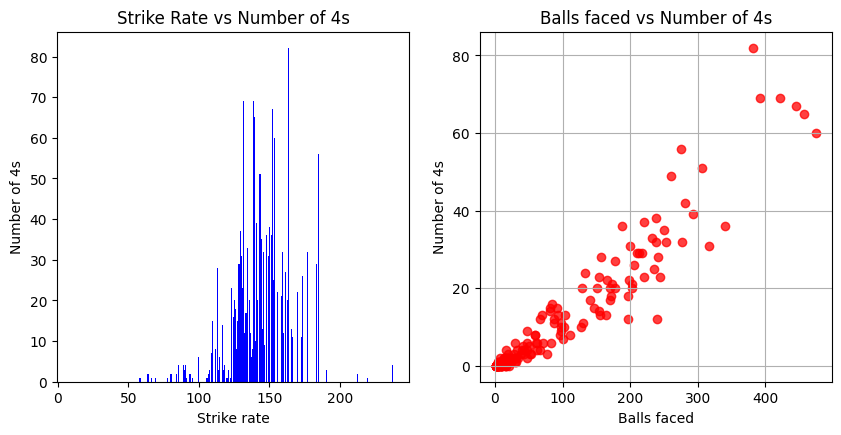

In [5]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.bar(df.SR, df['4s'], color='blue')
plt.ylabel('Number of 4s')
plt.xlabel('Strike rate')
plt.title('Strike Rate vs Number of 4s')

plt.subplot(2,2,2)
plt.scatter(df.BF, df['4s'], color='red', alpha = 0.75)
plt.ylabel('Number of 4s')
plt.xlabel('Balls faced')
plt.title('Balls faced vs Number of 4s')


plt.grid(True)
plt.show()

# HOW THE NO. OF 4S VARIES WITH THE MATCHED PLAYED

Text(0.5, 1.0, 'Matches vs Number of 4s')

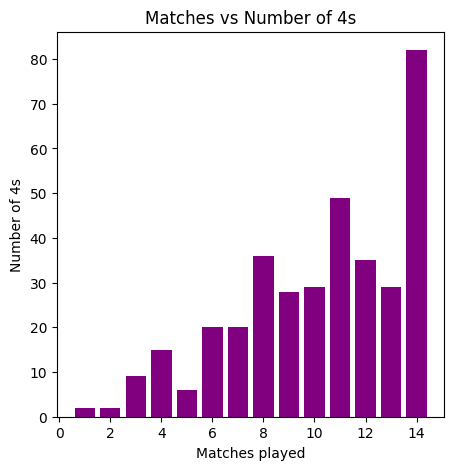

In [6]:
plt.figure(figsize=(5, 5))

plt.bar(df['Mat'], df['4s'], color='purple')
plt.ylabel('Number of 4s')
plt.xlabel('Matches played')
plt.title('Matches vs Number of 4s')

# WHICH TEAM MADE THE MAX NO. OF 4S

Text(0.5, 1.0, 'Teams vs Number of 4s')

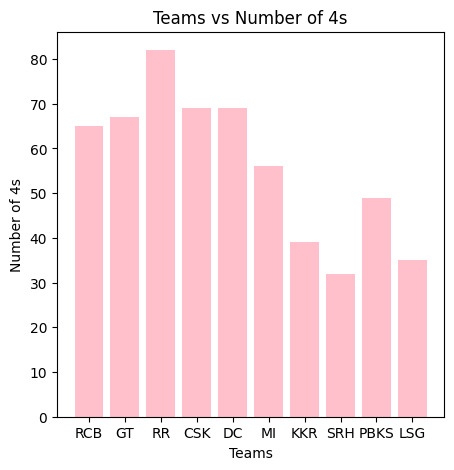

In [7]:
plt.figure(figsize=(5, 5))


plt.bar(df['Team'], df['4s'], color='pink')
plt.ylabel('Number of 4s')
plt.xlabel('Teams')
plt.title('Teams vs Number of 4s')

# HOW THE 4S VARY WITH AVERAGE

Text(0.5, 1.0, 'Avg vs Number of 4s')

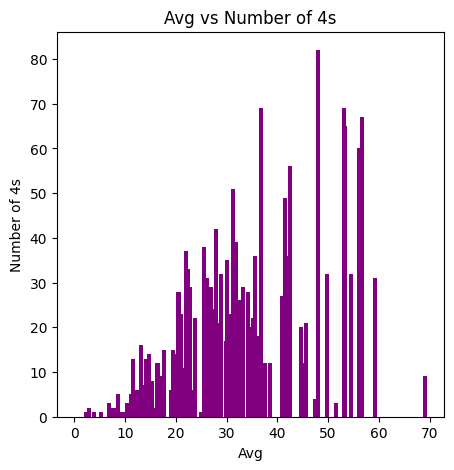

In [8]:
plt.figure(figsize=(5, 5))
plt.bar(df['Avg'], df['4s'], color='purple')
plt.ylabel('Number of 4s')
plt.xlabel('Avg')
plt.title('Avg vs Number of 4s')


# FOLLOWING GRAPH SHOWS THE PLAYERS WHO MADE MAXIMUM PERCENT OF THEIR RUNS WITH 4S

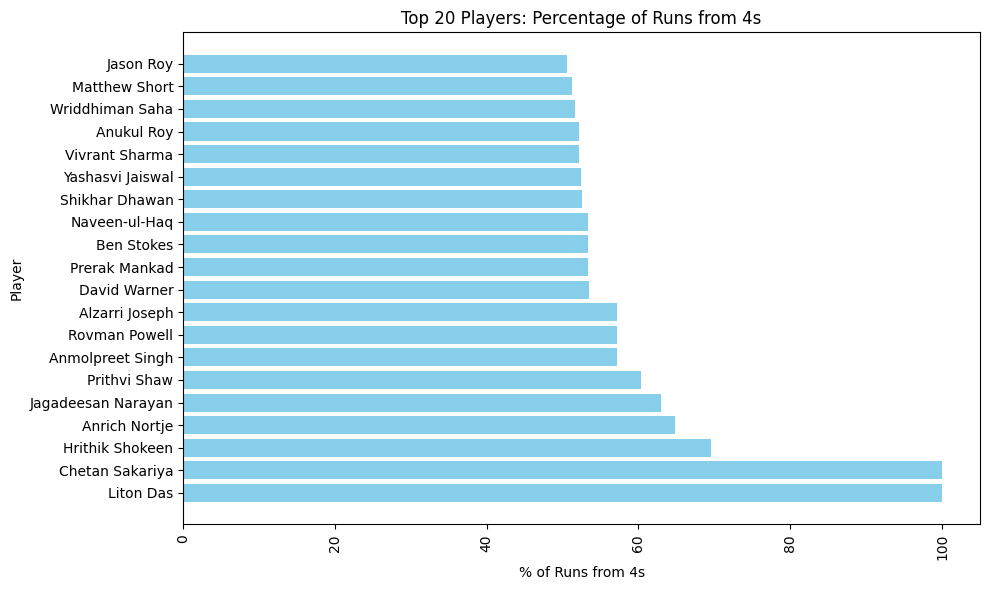

In [9]:
#WE ARE GONNA CALCULATE THE PERCENTAGE OF RUNS THAT CONTAINS 4S IN IT 
df2 = df.copy()
df2['Total_4s'] = df2['4s'] * 4
df2['Total_Runs'] = df2['Runs']

df2['Percentage_4s'] = (df2['Total_4s'] / df2['Total_Runs']) * 100

top_n = 20  
top_players = df2.nlargest(top_n, 'Percentage_4s')

plt.figure(figsize=(10, 6))
plt.barh(top_players['Name'], top_players['Percentage_4s'], color='skyblue')
plt.ylabel('Player')
plt.xlabel('% of Runs from 4s')
plt.title(f'Top {top_n} Players: Percentage of Runs from 4s')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


# FOLLOWING GRAPH SHOWS THE TOP PLAYERS WHO MADE SCORES WITH 4S

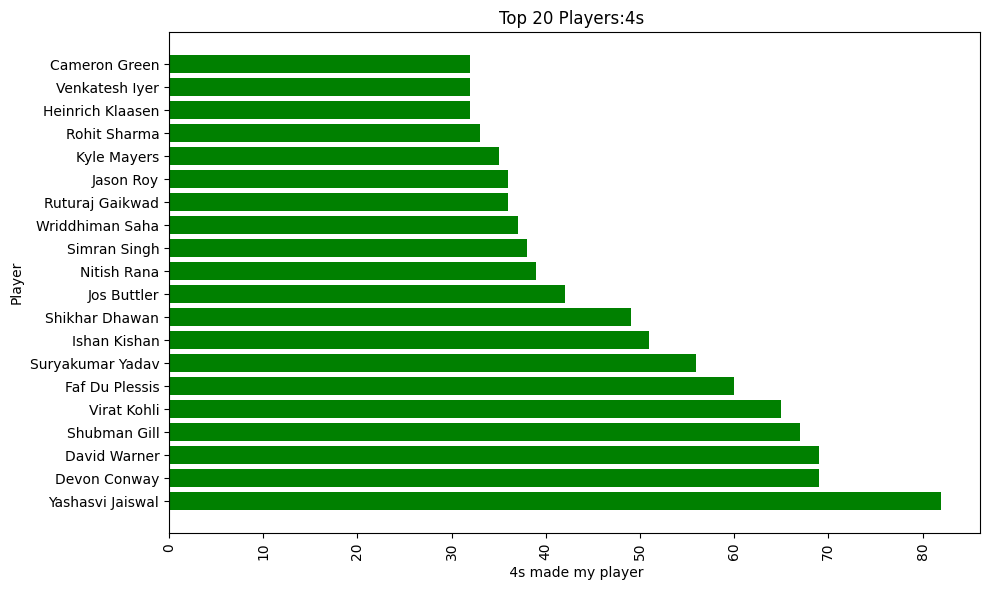

In [10]:
top_n = 20
top_players = df.nlargest(top_n, '4s')

# Plot the percentage contribution of 4s for top N players
plt.figure(figsize=(10, 6))
plt.barh(top_players['Name'], top_players['4s'], color='green')
plt.ylabel('Player')
plt.xlabel(' 4s made my player')
plt.title(f'Top {top_n} Players:4s ')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

# BAR PLOT SHOWING HOW THE 4S VARY WITH NO. OF INNINGS

Text(0.5, 1.0, 'Number of Innings vs Number of 4s')

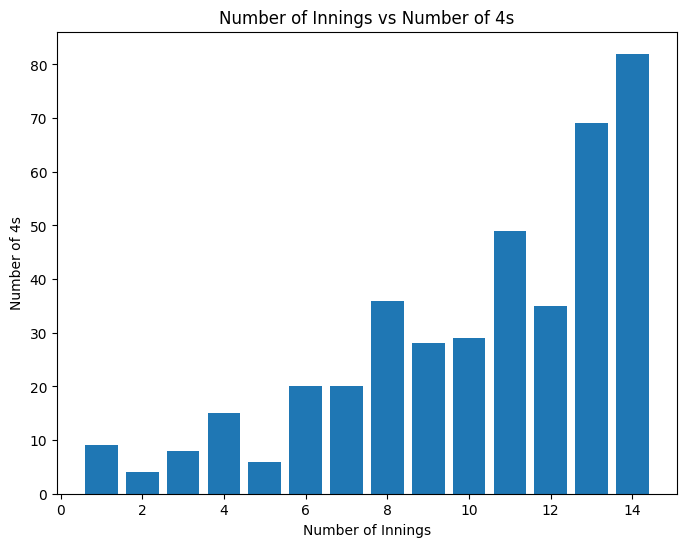

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(df.Inns, df['4s'])
plt.xlabel('Number of Innings')
plt.ylabel('Number of 4s')
plt.title('Number of Innings vs Number of 4s')


# CATEGORICAL ENCODING

In [12]:
#Dividing the dataset into X and y

y = df.iloc[:, -2].values #the target/dependent variable

exclude_column_index = 13  # wanna exclude the 4s col
X = df.iloc[:, [i for i in range(3, len(df.columns)) if i != exclude_column_index]].values

#Encoding the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1,2])], remainder = 'passthrough') #ENCODING THE 1ST AND 2ND COLUMNS
X = np.array(ct.fit_transform(X)) #FITTING THE 1 AND 2 COLUMNS IN X (independent variables)
print(X)

#Now everything is in numeric form so we can carry out our machine learning algos


[[ 0.  0.  0. ...  0.  8. 36.]
 [ 0.  0.  0. ...  2.  4. 22.]
 [ 0.  0.  0. ...  2.  6. 16.]
 ...
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]]


# **SPLITTING DATASET INTO TRAINING AND TESTING SET**

In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42 )



# FEATURE SCALING
*Doing feature scaling (to scale every feature(in training set because we wanna do analysis on training set actually and then gonna check it with testing set) in a perticular range)*

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,6:] = sc.fit_transform(X_train[:, 6:])
X_test[:, 6:] = sc.transform(X_test[:, 6:])
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.1798375 ,
         0.07335273, -0.28031354],
       [ 0.        ,  0.        ,  0.        , ..., -0.1798375 ,
        -0.56989431, -0.76449147],
       [ 0.        ,  0.        ,  0.        , ..., -0.1798375 ,
         1.35984681,  1.65639819],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.1798375 ,
         2.00309385,  0.93013129],
       [ 0.        ,  0.        ,  0.        , ..., -0.1798375 ,
        -0.56989431, -0.28031354],
       [ 0.        ,  1.        ,  0.        , ..., -0.1798375 ,
        -0.56989431, -0.76449147]])

# TRAINING THE MODEL

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
print("coeficient:",regressor.coef_) 
print("Intercept:",regressor.intercept_)

coeficient: [ 1.86966381e+14  1.86966381e+14  1.86966381e+14  1.86966381e+14
  1.86966381e+14  1.86966381e+14  2.45461102e+13  2.99282131e+13
  5.52043913e+13  4.48848295e+13  4.77591509e+13  2.45461102e+13
  4.77591509e+13  5.94279889e+13 -1.97800832e-01 -4.89075320e-01
 -5.42774337e-01 -2.18750000e-01 -3.12500000e-01 -6.81640625e-01
 -3.98437500e-01 -1.36718750e-02  1.69921875e-01  1.87500000e-01
  4.38828125e+01  2.59375000e+00 -6.51367188e-01 -1.87187500e+01
 -2.18750000e-01 -8.69140625e-01  9.06250000e-01 -1.30781250e+01]
Intercept: -98403358479509.33


# CALCULATING THE MEAN SQUARED ERROR FOR TEST AND TRAINING SET

In [17]:
from sklearn.metrics import mean_squared_error
ytest_pred = regressor.predict(X_test)
ytrain_pred =  regressor.predict(X_train)

mse_train = mean_squared_error(y_train, ytrain_pred)

# Calculate MSE for test data
mse_test = mean_squared_error(y_test, ytest_pred)

print("Mean Squared Error (MSE) for training data:", mse_train)
print("Mean Squared Error (MSE) for test data:", mse_test)

Mean Squared Error (MSE) for training data: 5.818065977933114
Mean Squared Error (MSE) for test data: 9.833097496811224


* **Mean Squared Error (MSE) for training data: 3.33870292899939e-26**
* **Mean Squared Error (MSE) for test data: 4.291197254614818e-26**

# PLOTTING THE GRAPH

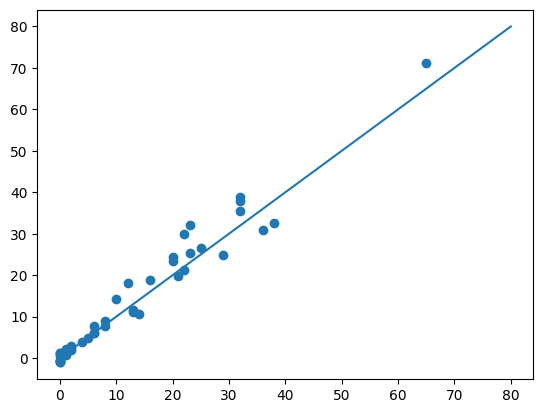

In [29]:
ytest_pred = regressor.predict(X_test) 
plt.scatter(y_test, ytest_pred)

x = np.linspace(0, 80, 100)
y = x
plt.plot(x, y)
plt.show()

**AS WE CAN SEE THAT ALL THE VALUES LIE ON THAT LINE SO LINEAR REGRESSION WAS PERFECT WAY TO DO THAT **

# HYPERPARAMETRIC TUNING USING RIDGE AND LASSO MODELS 

In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

#Defining ridge and lasso regression models
ridge = Ridge()
lasso = Lasso()

# Defining the hyperparameters(alpha) for both ridge and lasso models to get their search value
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

param_grid_lasso = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}


# Initialize GridSearchCV for Ridge Regression
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=0)

# Initialize GridSearchCV for Lasso Regression
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, n_jobs=-1, verbose=0)

# Fit GridSearchCV to the training data for Ridge Regression
grid_search_ridge.fit(X_train, y_train)

# Fit GridSearchCV to the training data for Lasso Regression
grid_search_lasso.fit(X_train, y_train)

# Printing the best parameters and the best scores
print("Best Parameters for Ridge: ", grid_search_ridge.best_params_)
print("Best Score for Ridge: ", grid_search_ridge.best_score_)

print("Best Parameters for Lasso: ", grid_search_lasso.best_params_)
print("Best Score for Lasso: ", grid_search_lasso.best_score_)

# Predicting with the best estimators on the test set
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

# Evaluating the performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Test MSE for Ridge: ", mse_ridge)
print("Test MSE for Lasso: ", mse_lasso)

Best Parameters for Ridge:  {'alpha': 0.1}
Best Score for Ridge:  0.9414179316226432
Best Parameters for Lasso:  {'alpha': 0.1}
Best Score for Lasso:  0.9460760546510396
Test MSE for Ridge:  11.964284805870044
Test MSE for Lasso:  17.00750446435907


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+02, tolerance: 2.367e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e+02, tolerance: 2.942e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+02, tolerance: 2.642e

* Test MSE for Ridge:  0.0005591680731234604
* Test MSE for Lasso:  0.00014895093219576604


# HYPERPARAMETRIC TUNING ON SAME DATASET BUT DECREASING THE RANGE OF ALPHA

**WE WILL SEE THAT ON DECREASING THE RANGE OF THE HYPERPARAMETER ALPA, WE GET A HIGHER MSE; INCREASING THE RANGE IMPROVES BETTER TUNING AS IT PROVIDE A BETTER RANGE AND THUS LOWER MSE**

In [20]:
# Defining the hyperparameters(alpha) for both ridge and lasso models to get their search value
param_grid_ridge1 = {
    'alpha': [0.1, 1, 10, 100, 1000]
}

param_grid_lasso1 = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}


# Initialize GridSearchCV for Ridge Regression
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge1, cv=5, n_jobs=-1, verbose=0)

# Initialize GridSearchCV for Lasso Regression
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso1, cv=5, n_jobs=-1, verbose=0)

# Fit GridSearchCV to the training data for Ridge Regression
grid_search_ridge.fit(X_train, y_train)

# Fit GridSearchCV to the training data for Lasso Regression
grid_search_lasso.fit(X_train, y_train)

# Printing the best parameters and the best scores
print("Best Parameters for Ridge: ", grid_search_ridge.best_params_)
print("Best Score for Ridge: ", grid_search_ridge.best_score_)

print("Best Parameters for Lasso: ", grid_search_lasso.best_params_)
print("Best Score for Lasso: ", grid_search_lasso.best_score_)

# Predicting with the best estimators on the test set
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

best_lasso = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

# Evaluating the performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Test MSE for Ridge: ", mse_ridge)
print("Test MSE for Lasso: ", mse_lasso)

Best Parameters for Ridge:  {'alpha': 0.1}
Best Score for Ridge:  0.9414179316226432
Best Parameters for Lasso:  {'alpha': 0.1}
Best Score for Lasso:  0.9460760546510396
Test MSE for Ridge:  11.964284805870044
Test MSE for Lasso:  17.00750446435907


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.139e+01, tolerance: 2.367e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+02, tolerance: 3.207e+00
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+02, tolerance: 2.942e

* Test MSE for Ridge:  2.4994292748338287
* Test MSE for Lasso:  0.00014895093219576604